# 100. Boston House Price Regression

- 보스턴 주택가격 예측

### 13 개의 종속변수와 1 개의 독립변수 (주택가격 중앙값) 으로 구성

#### 종속변수 (13 개)
CRIM 자치시(town) 별 1인당 범죄율  
ZN 25,000 평방피트를 초과하는 거주지역의 비율  
INDUS 비소매상업지역이 점유하고 있는 토지의 비율  
CHAS 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)  
NOX 10ppm 당 농축 일산화질소  
RM 주택 1가구당 평균 방의 개수  
AGE 1940년 이전에 건축된 소유주택의 비율  
DIS 5개의 보스턴 직업센터까지의 접근성 지수  
RAD 방사형 도로까지의 접근성 지수  
TAX 10,000 달러 당 재산세율  
PTRATIO 자치시(town)별 학생/교사 비율  
B 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함  
LSTAT 모집단의 하위계층의 비율(%)   

#### 독립변수 (1 개)
MEDV 본인 소유의 주택가격(중앙값) (단위: $1,000)  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
df_boston = pd.read_csv("/content/drive/MyDrive/GDG AI ML Study/boston_house.csv")
df_boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
boston = df_boston.drop('medv', axis=1)
target = df_boston.pop('medv')

In [ ]:
X = boston.values
y = target.values
X.shape, y.shape

((506, 13), (506,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [ ]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### model build

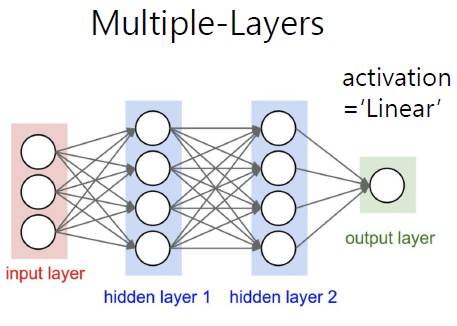

In [ ]:
# 위 사진과 같은 모델을 코드로 표현(입력데이터 13개, 2개의 은닉층)
model = Sequential()
model.add(Dense(64,input_shape = (13,), activation="relu")) # 입력은 꼭 튜플 형태로 해줘야함
model.add(Dense(32,activation="relu")) # 처음에만 데이터 입력을 해주고 그 이후에는 그 전 레이어를 입력으로 받기 때문에 Keras가 알아서 계산해서
model.add(Dense(1)) # 마지막엔 레이어 1개, 선형회귀니깐 활성화 함수 X, activation X

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary() # 처음에 입력층은 레이어가 아니다.
# 896개의 가중치 = 입력데이터(13) * 은닉층1레이어(64) + 각 은닉층 뉴런마다 bias존재(64
# 13 * 64 + 64 = 896

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

- 컴파일

In [ ]:
model.compile(loss="mean_squared_error", optimizer="adam",metrics=["mse","mae"]) # 무엇을 손실함수로 정할지 정한다
# 너무 작업이 길어지는 경우 중간중간에 출력해보는거임, 얼마나 잘 진행되고 있는지, mse,mae로도 출력해보는거임


- epoch 수와 batchz_size 변경하며 test

In [ ]:
# 미니배치경사하강법을 사용하기 때문에 배치 사이즈를 정해준다.
history = model.fit(X_train, y_train, batch_size=32,
                    epochs=500, validation_data=(X_test, y_test), verbose=1)
# GPU 사이즈가 크면 배치 사이즈를 크게
# verbose = 0은 중간 메시지를 아예 출력X, 출력할거면 1 or 2

Epoch 1/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 395ms/step - loss: 575.5054 - mae: 22.0844 - mse: 575.5054 - val_loss: 564.4550 - val_mae: 21.7736 - val_mse: 564.4550
Epoch 2/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 576.7151 - mae: 22.2147 - mse: 576.7151 - val_loss: 535.8810 - val_mae: 21.0640 - val_mse: 535.8810
Epoch 3/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 541.1834 - mae: 21.1803 - mse: 541.1834 - val_loss: 495.0894 - val_mae: 20.0006 - val_mse: 495.0894
Epoch 4/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 477.2615 - mae: 19.6328 - mse: 477.2615 - val_loss: 438.2882 - val_mae: 18.3941 - val_mse: 438.2882
Epoch 5/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 443.2187 - mae: 18.4440 - mse: 443.2187 - val_loss: 364.4893 - val_mae: 16.1092 - val_mse: 364.4893
Epoch 6/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 342.3968 - mae: 15.5653 - mse: 342.3968 - val_loss: 283.2850 - val_mae: 13.6103 - val_mse: 283.2850
Epoch 7/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.2991 - mae: 2.2421 - mse: 11.2991 


[9.928190231323242, 9.928190231323242, 2.091413974761963]

In [ ]:
y_pred = model.predict(X_test)

# MSE(mean squared error) 계산
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))

# R2 계산
print("R2 score: {:.2f}".format(r2_score(y_test, y_pred)))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Mean squared error: 9.93
R2 score: 0.89


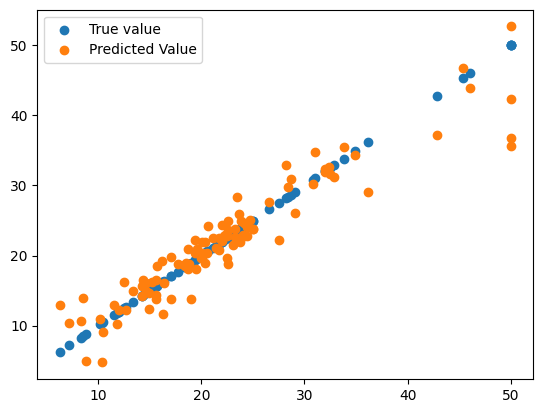

In [ ]:
plt.scatter(y_test, y_test, label="True value")
plt.scatter(y_test,y_pred, label="Predicted Value")

plt.legend()

Text(0, 0.5, 'Loss(MSE)')

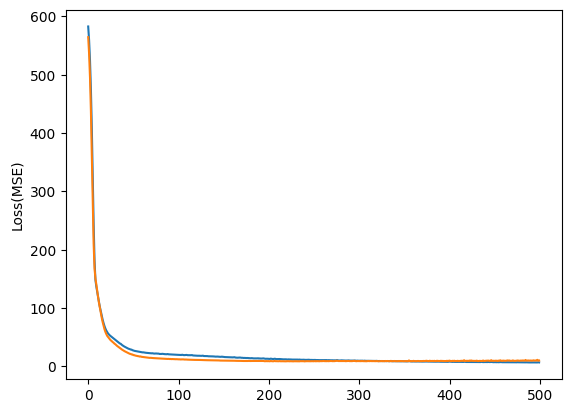

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.ylabel("Loss(MSE)") # 손실이 점점 줄어든다.

## sklearn LinearRegression 비교

In [ ]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regr.predict(X_test)
r2_score(y_test, y_pred)

0.801275104739968

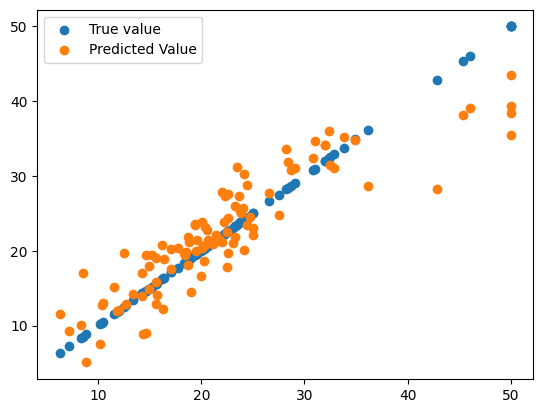

In [ ]:
plt.scatter(y_test, y_test, label="True value")
plt.scatter(y_test,y_pred, label="Predicted Value")

plt.legend() # 뒤로 갈수록 뉴럴 네트워크에 비해 정확도가 떨어진다

## 실습

### UCI Machine Learning Repository 의 Auto MPG dataset 을 사용하여 자동차 연비 예측 Regression model 작성

- auto-mpg.data - data file  


- auto-mpg.names - data 설명 file

    1. mpg:           continuous  
    2. cylinders:     multi-valued discrete  
    3. displacement:  continuous (배기량)   
    4. horsepower:    continuous  
    5. weight:        continuous  
    6. acceleration:  continuous  
    7. model year:    multi-valued discrete  
    8. origin:        multi-valued discrete, 1 - USA, 2 - Europe, 3 - Japan  
    9. car name:      string (unique for each instance)  

Missing Attribute Values:  horsepower has 6 missing values  ==> "?" 로 들어 있으므로 read_csv 시 nan 으로 변환

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Data load 및 Preprocessing

In [ ]:
data_path = tf.keras.utils.get_file("auto-mpg.data",
        "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

rawdata = pd.read_csv(data_path, names=column_names, na_values="?", comment="\t", sep=" ", skipinitialspace=True)

rawdata.dropna(inplace=True)

data = rawdata.copy()

data = pd.get_dummies(data, columns=['cylinders', 'origin']) # 원-핫 인코딩

label = data.pop('mpg')

X_train, X_test, y_train, y_test = train_test_split(data.values, label.values)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) # 데이터 준비 완료

   8192/Unknown 0s 19us/step

### Regression Model Build



In [ ]:
X_train.shape

model = Sequential()
model.add(Dense(64,input_shape = (13,), activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1))

(294, 13)

# train

In [ ]:
model.compile(loss="mean_squared_error", optimizer="adam", metrics=['mse','mae'])

history = model.fit(X_train, y_train, batch_size = 64,
                    epochs = 300, validation_data=(X_test, y_test), verbose = 1)

Epoch 1/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 305ms/step - loss: 629.0813 - mae: 23.8367 - mse: 629.0813 - val_loss: 582.0016 - val_mae: 22.9738 - val_mse: 582.0016
Epoch 2/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 603.6353 - mae: 23.2213 - mse: 603.6353 - val_loss: 566.0648 - val_mae: 22.6252 - val_mse: 566.0648
Epoch 3/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 588.4567 - mae: 22.8499 - mse: 588.4567 - val_loss: 550.9976 - val_mae: 22.2900 - val_mse: 550.9976
Epoch 4/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 564.5080 - mae: 22.4520 - mse: 564.5080 - val_loss: 535.4169 - val_mae: 21.9413 - val_mse: 535.4169
Epoch 5/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 557.7183 - mae: 22.3219 - mse: 557.7183 - val_loss: 518.2781 - val_mae: 21.5570 - val_mse: 518.2781
Epoch 6/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 531.5917 - mae: 21.6561 - mse: 531.5917 - val_loss: 499.2012 - val_mae: 21.1223 - val_mse: 499.2012
Epoch 7/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - 

### predict



In [ ]:
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


### $r^2$ 계산



### 시각화

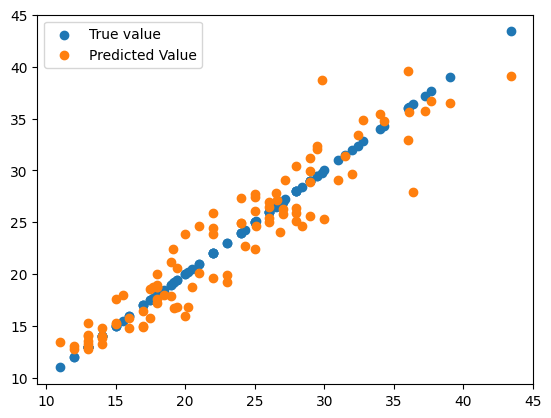

In [ ]:
plt.scatter(y_test, y_test, label="True value")
plt.scatter(y_test,y_pred, label="Predicted Value")

plt.legend()

In [ ]:
data.head() # displacement가 얼마일 때 원래는 연비가 얼마인데, 거기에 대해서 얼마나 맞췄는지, 하나씩 시각화 해보기

,displacement,horsepower,weight,acceleration,model year,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
0,307.0,130.0,3504.0,12.0,70,False,False,False,False,True,True,False,False
1,350.0,165.0,3693.0,11.5,70,False,False,False,False,True,True,False,False
2,318.0,150.0,3436.0,11.0,70,False,False,False,False,True,True,False,False
3,304.0,150.0,3433.0,12.0,70,False,False,False,False,True,True,False,False
4,302.0,140.0,3449.0,10.5,70,False,False,False,False,True,True,False,False


# 데이터 값 하나에 대해서 시각화 해보기

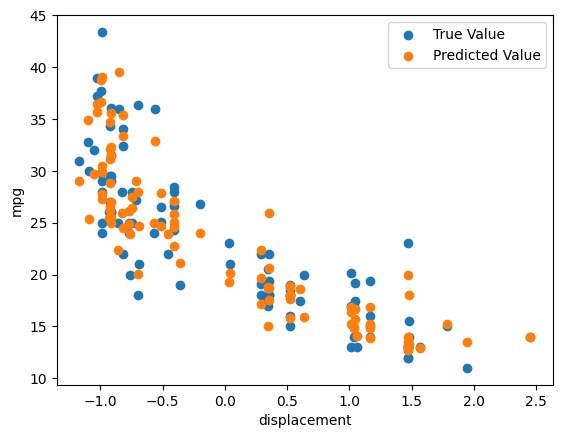

In [ ]:
plt.scatter(X_test[:,0], y_test, label = "True Value") # 실젯값 시각
plt.scatter(X_test[:,0], y_pred, label = "Predicted Value") # 우리가 예측한 값 시각화

plt.xlabel("displacement")
plt.ylabel("mpg") # 배기량
plt.legend()
# 배기량이 커질수록 연비가 떨어진다.

# 차의 무게와 연비의 관계

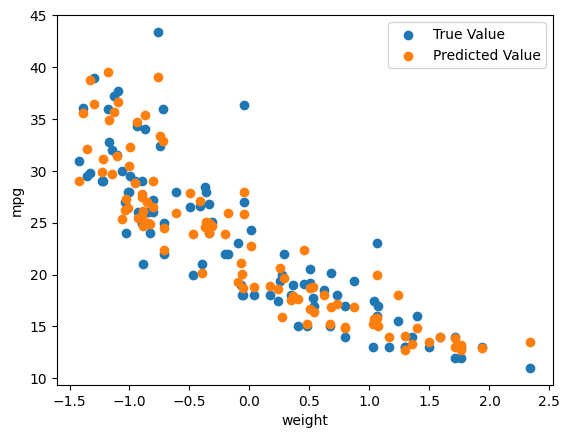

In [ ]:
plt.scatter(X_test[:,2], y_test, label = "True Value") # 실젯값 시각
plt.scatter(X_test[:,2], y_pred, label = "Predicted Value") # 우리가 예측한 값 시각화

plt.xlabel("weight")
plt.ylabel("mpg") # 배기량
plt.legend()
# 차가 무거워지면 배기량이 떨어진다.

# 마력과 배기량의 관계 시각화


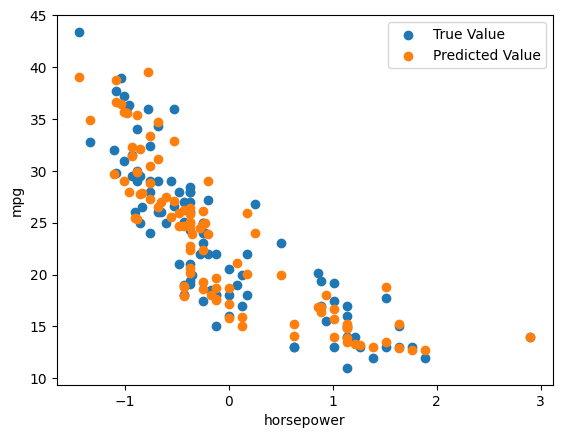

In [ ]:
plt.scatter(X_test[:,1], y_test, label = "True Value") # 실젯값 시각
plt.scatter(X_test[:,1], y_pred, label = "Predicted Value") # 우리가 예측한 값 시각화

plt.xlabel("horsepower")
plt.ylabel("mpg") # 배기량, 연
plt.legend()

# 기름을 많이 먹으면(마력이 커지면) 배기량이 떨아짐